In [6]:
using Plots
using LinearAlgebra
using SparseArrays
using Roots

In [184]:
# Chase Abram

function maxK(z,alpha,delta)
    return (z/alpha)^(1/(1-alpha))
end

function T(V,K,z,alpha,beta,delta)
    return [maximum(log.(max.(z.*k.^alpha .+ (1-delta).*k .- K,1e-10)) + beta.*V) for k in K]
end

function g_inds(V,K,z,alpha,beta,delta)
    return [findmax(log.(max.(z.*k.^alpha .+ (1-delta).*k .- K,1e-10)) + beta.*V)[2] for k in K]
end

function makeK(z,alpha,delta,n)
    return LinRange(0.1,maxK(z,alpha,delta),n)
end

# function g(DV,K,z,alpha,beta,delta)
#     return z.*K.^alpha .+ (1-delta).*K .- (z*alpha.*K.^(alpha-1) .+ (1-delta))./DV
# end

function steadyK(z,alpha,beta,delta)
    return (1/(alpha*z)*(1/beta -1 + delta))^(1/(alpha-1))
end





steadyK (generic function with 1 method)

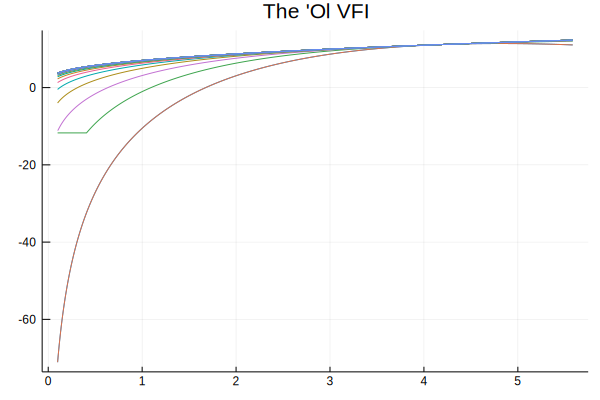

Iterations: 43


In [188]:
n = 1000
z = 1.0
alpha = 0.3
beta = 0.99
delta = 0.1
V = zeros(n)
# Vnew = zeros(n)
K = makeK(z,alpha,delta,n)
V = log.((z.*K.^alpha .- delta.*K))/(1-beta)

tol = 1e-5
max_it = 1000

it = 1
Vdiff = Inf

p = plot(K,V, title = "The 'Ol VFI", label = it, legend = false)

while it < max_it && Vdiff > tol
    Vnew .= T(V,K,z,alpha,beta,delta)
    plot!(K,V, label = it)
    
    Vdiff = maximum(abs.(Vnew .- V))
    V .= Vnew
    it += 1
end
display(p)
println("Iterations: ", it)



In [189]:


# dK = [diff(K);diff(K)[end]]

# dV = [diff(V);diff(V)[end]]

# DV = dV./dK

# println(dV)

# gK = g(DV,K,z,alpha,beta,delta)

# p = plot(K,gK, title = "The OG", legend = false)
# display(p)
# dV = [diff(V); diff(V)[length(diff(V))]]
# plot(K,DV)

gK = [findmax(log.(max.(z.*k.^alpha .+ (1-delta).*k .- K,1e-10)) + beta.*V)[2] for k in K]

1000-element Array{Int64,1}:
  46
  47
  49
  51
  52
  54
  55
  57
  58
  59
  61
  62
  64
   ⋮
 957
 958
 959
 959
 960
 961
 962
 963
 964
 965
 965
 966

In [190]:
# c = z.*K.^alpha .+ (1-delta).*K .- gK
# plot(K,c)

In [196]:
# plot(K,gK)
# plot!(K,K)
K[gK]
K

1000-element LinRange{Float64}:
 0.1,0.10549,0.11098,0.116469,0.121959,…,5.56784,5.57333,5.57882,5.58431

In [193]:
findmin(abs.(K .- K[gK]))

(0.0, 745)

In [197]:
K[745]

4.184412171282829

In [174]:
# g_inds(DV,K,z,alpha,beta,delta,46)

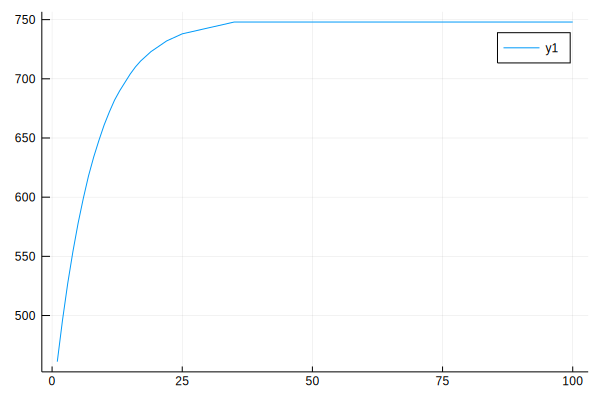

In [175]:
k1 = 461
g_ind = zeros(100)
gs = zeros(100)
g_ind[1] = k1
gs[1] = K[Int(g_ind[1])]
for i in 2:100
    g_ind[i] = gK[Int(g_ind[i-1])]
    gs[i] = K[Int(g_ind[i])]
end

plot(1:100, g_ind)
# gK[47]


In [158]:
Int(g_ind[2])

496

In [185]:
steadyK(z,alpha,beta,delta)

4.186970784697233